In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import image
from matplotlib import pyplot

In [2]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [3]:
train_set.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
test_set.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


array([[<AxesSubplot:title={'center':'battery_power'}>,
        <AxesSubplot:title={'center':'blue'}>,
        <AxesSubplot:title={'center':'clock_speed'}>],
       [<AxesSubplot:title={'center':'dual_sim'}>,
        <AxesSubplot:title={'center':'fc'}>,
        <AxesSubplot:title={'center':'four_g'}>],
       [<AxesSubplot:title={'center':'int_memory'}>,
        <AxesSubplot:title={'center':'m_dep'}>,
        <AxesSubplot:title={'center':'mobile_wt'}>],
       [<AxesSubplot:title={'center':'n_cores'}>,
        <AxesSubplot:title={'center':'pc'}>,
        <AxesSubplot:title={'center':'px_height'}>],
       [<AxesSubplot:title={'center':'px_width'}>,
        <AxesSubplot:title={'center':'ram'}>,
        <AxesSubplot:title={'center':'sc_h'}>],
       [<AxesSubplot:title={'center':'sc_w'}>,
        <AxesSubplot:title={'center':'talk_time'}>,
        <AxesSubplot:title={'center':'three_g'}>],
       [<AxesSubplot:title={'center':'touch_screen'}>,
        <AxesSubplot:title={'center':'wifi'}

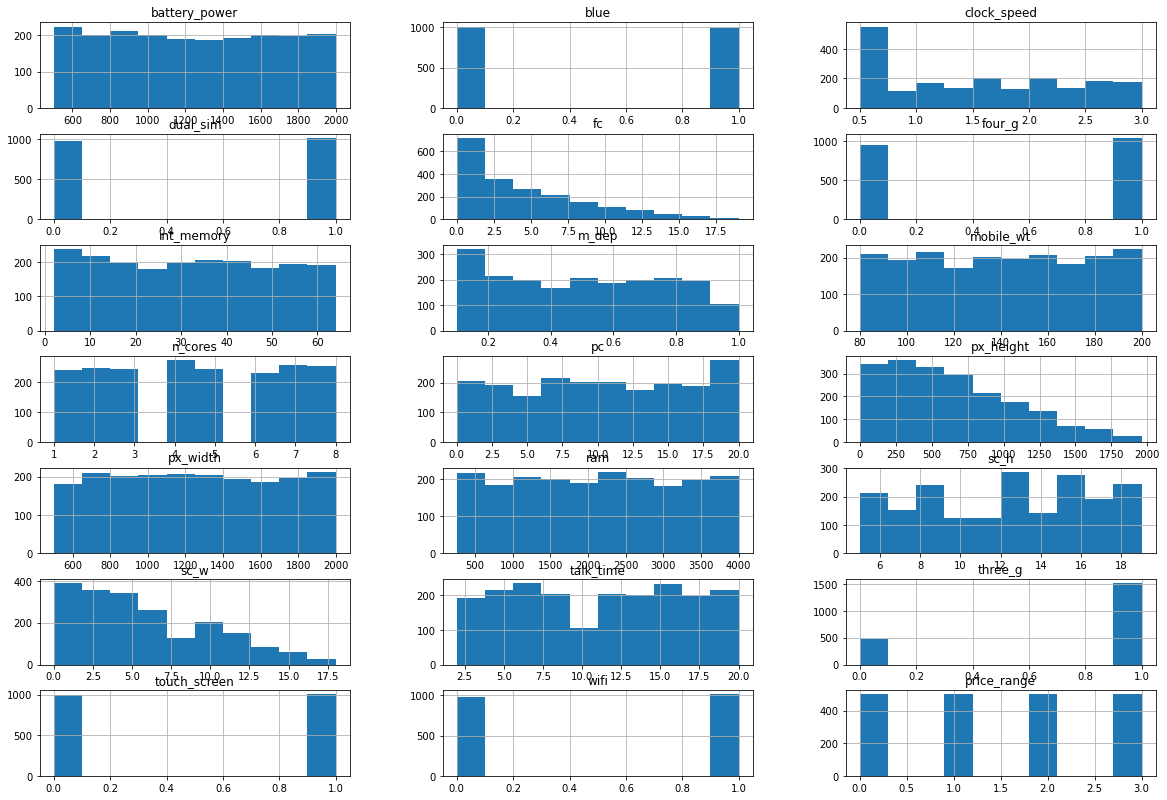

In [5]:
#Analise exploratoria do conjunto de treinamento
train_set.hist(layout=(10,3), figsize=(20,20))

In [6]:
#Identificamos que:
#Variavel resposta: price_range
#Variaveis categoricas: three_g, wi_fi, touch_screen, blue, dual_sim, four_g, n_cores, 
#Variaveis continuas: battery_power, clock_speed, fc, pc, px_height, px_width, ram, sc_h, sc_w, talk_time

#Escala: Normalização de escala (0-20) 
#Motivo: Menor valor de escala entre 4 variaveis que usam essa escana naturalmente
#Pode ser alterado conforme necessidade do modelo
#Variaveis a serem normalizadas: battery_power, int_memory, ram, px_height, px_width

#Distribuição dos celulares está praticamente uniforme em todos os ranges. Novos ajustes não serão considerados
#até o momento

#Iremos testar uma regressão logística para verificar se o modelo se adequa os dados de teste.

In [7]:
variaveis_continuas = train_set[['battery_power', 'px_height', 'px_width', 'mobile_wt']].values / 100
print(variaveis_continuas)

[[ 8.42  0.2   7.56]
 [10.21  9.05 19.88]
 [ 5.63 12.63 17.16]
 ...
 [19.11  8.68 16.32]
 [15.12  3.36  6.7 ]
 [ 5.1   4.83  7.54]]


In [8]:
variaveis_continuas = np.append(variaveis_continuas, train_set [['ram']].values / 200, axis = 1)

array([[ 8.42 ,  0.2  ,  7.56 , 12.745],
       [10.21 ,  9.05 , 19.88 , 13.155],
       [ 5.63 , 12.63 , 17.16 , 13.015],
       ...,
       [19.11 ,  8.68 , 16.32 , 15.285],
       [15.12 ,  3.36 ,  6.7  ,  4.345],
       [ 5.1  ,  4.83 ,  7.54 , 19.595]])

In [9]:
variaveis_continuas = np.append(variaveis_continuas, train_set [['int_memory']].values / 3, axis = 1)

[[ 8.42  0.2   7.56]
 [10.21  9.05 19.88]
 [ 5.63 12.63 17.16]
 ...
 [19.11  8.68 16.32]
 [15.12  3.36  6.7 ]
 [ 5.1   4.83  7.54]]


In [11]:
variaveis_continuas = np.append(variaveis_continuas, train_set [['fc', 'n_cores', 'pc', 'sc_h', 'sc_w', 'talk_time' ]].values , axis = 1)

In [ ]:
variaveis_continuas = np.append(variaveis_continuas, train_set [['clock_speed' ]].values , axis = 1)

In [12]:
variaveis_categoricas = train_set[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi' ]]

[[ 8.42  0.2   7.56 ...  9.    7.   19.  ]
 [10.21  9.05 19.88 ... 17.    3.    7.  ]
 [ 5.63 12.63 17.16 ... 11.    2.    9.  ]
 ...
 [19.11  8.68 16.32 ...  9.    1.    5.  ]
 [15.12  3.36  6.7  ... 18.   10.   19.  ]
 [ 5.1   4.83  7.54 ... 19.    4.    2.  ]]
